In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline
sns.set(style="whitegrid")

# Load dataset directly
csv_file = 'student-mat.csv'

try:
    df = pd.read_csv(csv_file)
    print("✅ Dataset loaded successfully.")
except Exception as e:
    print(f"❌ Failed to load dataset: {e}")

# View first few rows
print("\n🔍 First 5 rows:")
print(df.head())

# -------------------------------------------
# 🧹 Step 2: Explore & Clean Data
# -------------------------------------------
print("\n📋 Dataset Info:")
df.info()

print("\n❓ Missing Values:")
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()
print(f"\n🧼 Cleaned Data Shape: {df_cleaned.shape}")

# -------------------------------------------
# 📊 Step 3: Basic Data Analysis
# -------------------------------------------
print("\n📈 Descriptive Statistics:")
print(df_cleaned.describe())

# Example group analysis – group by final grade performance
if 'G3' in df_cleaned.columns:
    df_cleaned['performance'] = pd.cut(df_cleaned['G3'],
                                       bins=[-1, 9, 14, 20],
                                       labels=['Low', 'Average', 'High'])

    print("\n📂 Grouped by Performance Level (based on G3):")
    grouped = df_cleaned.groupby('performance').mean(numeric_only=True)
    print(grouped)

# -------------------------------------------
# 📈 Step 4: Visualizations
# -------------------------------------------

# 1. Line Chart – Age vs Final Grade
plt.figure(figsize=(10, 5))
df_sorted = df_cleaned.sort_values(by='age')
plt.plot(df_sorted['age'], df_sorted['G3'], label='Final Grade', color='green')
plt.title('Age vs Final Grade (G3)')
plt.xlabel('Age')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

# 2. Bar Chart – Average Study Time by Performance
if 'performance' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_cleaned, x='performance', y='studytime', palette='Set2')
    plt.title('Average Study Time by Performance')
    plt.xlabel('Performance')
    plt.ylabel('Study Time')
    plt.show()

# 3. Histogram – Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter Plot – Study Time vs Final Grade
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='studytime', y='G3', hue='performance', palette='coolwarm')
plt.title('Study Time vs Final Grade by Performance')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.legend(title='Performance')
plt.show()


✅ Dataset loaded successfully.

🔍 First 5 rows:
  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"

KeyError: 'age'

<Figure size 1000x500 with 0 Axes>

✅ Dataset loaded successfully.

🔍 First 5 rows:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null  

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000



💘 Average Final Grade by Romantic Relationship:
romantic
no     10.836502
yes     9.575758
Name: G3, dtype: float64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


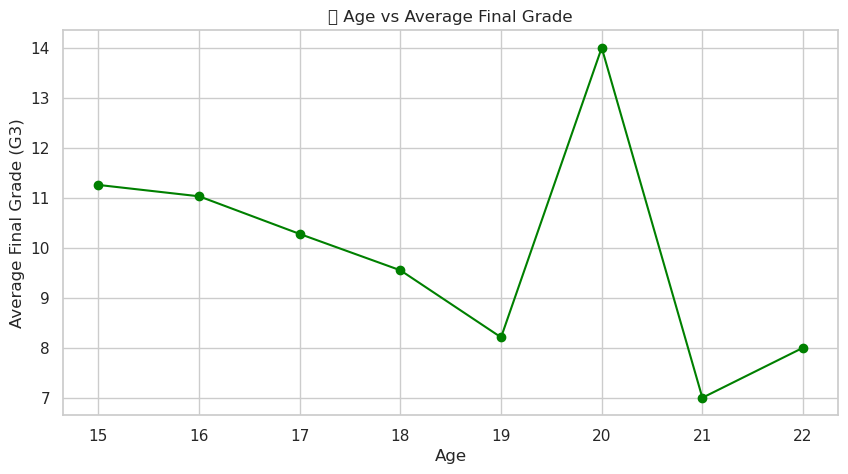

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


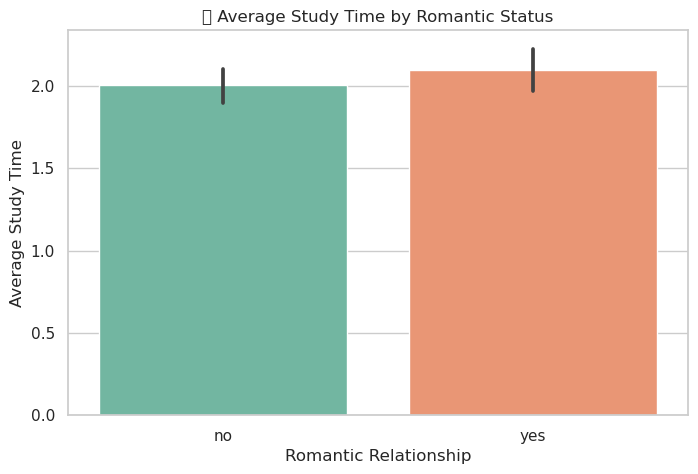

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


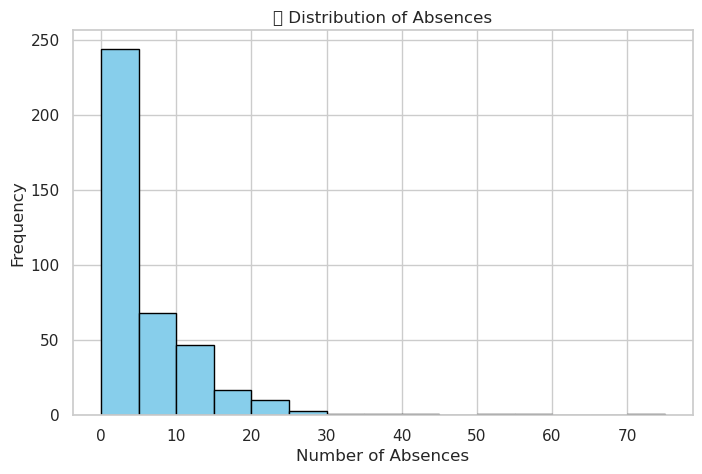

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


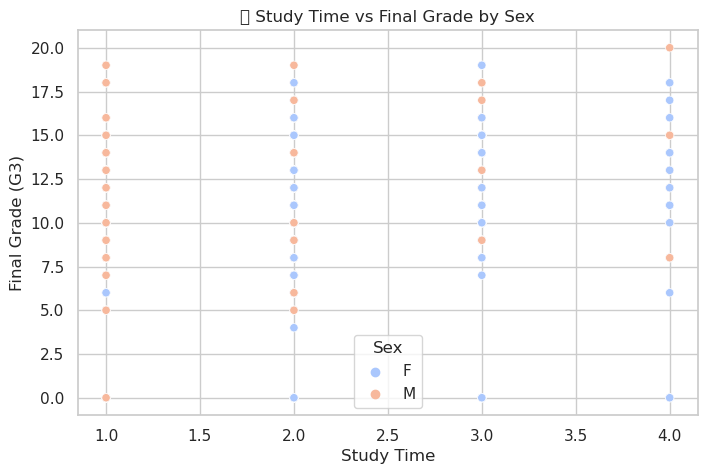

In [11]:
# -------------------------------------------
# 📦 Task 1: Load and Explore the Dataset
# -------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset with proper delimiter and handle errors
try:
    df = pd.read_csv('student-mat.csv', delimiter=';')
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: student-mat.csv not found.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

# Display the first few rows
print("\n🔍 First 5 rows:")
display(df.head())

# Dataset info
print("\n📋 Dataset Information:")
df.info()

# Check for missing values
print("\n🧪 Missing Values:")
print(df.isnull().sum())

# Drop missing values
df_cleaned = df.dropna()
print(f"\n🧼 Cleaned Data Shape: {df_cleaned.shape}")

# -------------------------------------------
# 📊 Task 2: Basic Data Analysis
# -------------------------------------------

# Basic statistics
print("\n📈 Descriptive Statistics:")
display(df_cleaned.describe())

# Group by 'romantic' and get average final grade (G3)
if 'romantic' in df_cleaned.columns and 'G3' in df_cleaned.columns:
    romantic_group = df_cleaned.groupby('romantic')['G3'].mean()
    print("\n💘 Average Final Grade by Romantic Relationship:")
    print(romantic_group)

# -------------------------------------------
# 📉 Task 3: Data Visualizations
# -------------------------------------------

# 1. Line Chart – Age vs Final Grade
if 'age' in df_cleaned.columns and 'G3' in df_cleaned.columns:
    plt.figure(figsize=(10, 5))
    age_avg_grade = df_cleaned.groupby('age')['G3'].mean().reset_index()
    plt.plot(age_avg_grade['age'], age_avg_grade['G3'], marker='o', color='green')
    plt.title('📈 Age vs Average Final Grade')
    plt.xlabel('Age')
    plt.ylabel('Average Final Grade (G3)')
    plt.grid(True)
    plt.show()

# 2. Bar Chart – Study Time by Romantic Status
if 'romantic' in df_cleaned.columns and 'studytime' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_cleaned, x='romantic', y='studytime', palette='Set2')
    plt.title('📊 Average Study Time by Romantic Status')
    plt.xlabel('Romantic Relationship')
    plt.ylabel('Average Study Time')
    plt.show()

# 3. Histogram – Distribution of Absences
if 'absences' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned['absences'], bins=15, color='skyblue', edgecolor='black')
    plt.title('📚 Distribution of Absences')
    plt.xlabel('Number of Absences')
    plt.ylabel('Frequency')
    plt.show()

# 4. Scatter Plot – Study Time vs Final Grade
if 'studytime' in df_cleaned.columns and 'G3' in df_cleaned.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_cleaned, x='studytime', y='G3', hue='sex', palette='coolwarm')
    plt.title('🎯 Study Time vs Final Grade by Sex')
    plt.xlabel('Study Time')
    plt.ylabel('Final Grade (G3)')
    plt.legend(title='Sex')
    plt.show()
